<a href="https://colab.research.google.com/github/karunamayi06/CODSOFT/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score,roc_auc_score,roc_curve
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
#

In [43]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
fd=pd.read_csv("/content/drive/MyDrive/ml/Titanic-Dataset.csv")

In [45]:
fd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [46]:
fd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [47]:
fd.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
fd['Sex'] = enc.fit_transform(fd['Sex'])
fd['Embarked'] = enc.fit_transform(fd['Embarked'])

In [49]:
fd["Age"].fillna(fd["Age"].mean(),inplace=True)
fd["Embarked"].fillna(fd["Embarked"].mode(),inplace=True)
fd=fd.drop("Cabin",axis=1)

In [22]:
!pip install lazypredict

In [23]:
import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [50]:
x= fd[['Pclass','Age','Sex',"SibSp","Embarked"]]
y=fd['Survived']


we avoided fare because its similar to Pclass

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [52]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


100%|██████████| 29/29 [00:01<00:00, 23.55it/s]

[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 78
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [53]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.82               0.80     0.80      0.82   
AdaBoostClassifier                 0.81               0.80     0.80      0.81   
LogisticRegression                 0.81               0.80     0.80      0.81   
LGBMClassifier                     0.81               0.79     0.79      0.81   
QuadraticDiscriminantAnalysis      0.79               0.79     0.79      0.80   
LabelSpreading                     0.81               0.79     0.79      0.80   
NuSVC                              0.81               0.79     0.79      0.80   
KNeighborsClassifier               0.80               0.79     0.79      0.80   
CalibratedClassifierCV             0.80               0.79     0.79      0.80   
LinearSVC                          0.79               0.78     0.78      0.79   
LinearDiscriminantAnalysis  

Accuracy is low so we analyse the data and try to get some insights


We understand we tried to predict using Gender,Pclass, Age,sibsp,Parch

we try data charts for better insights


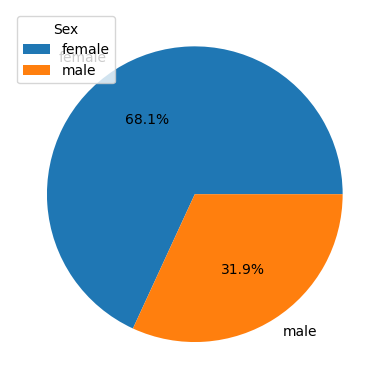

In [31]:
import matplotlib.pyplot as plt
survived_by_sex = fd[fd['Survived'] == 1]['Sex'].value_counts()
plt.pie(survived_by_sex, labels=survived_by_sex.index, autopct='%1.1f%%')
plt.legend(title='Sex')
plt.show()


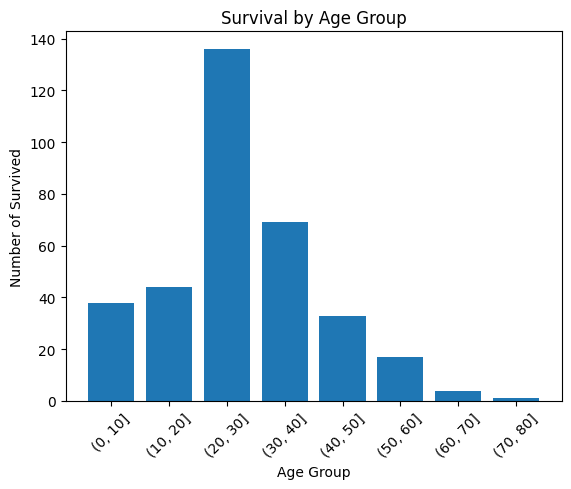

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
age_groups = pd.cut(fd['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
survived_by_age = fd[fd['Survived'] == 1].groupby(age_groups)['Age'].count()
plt.bar(survived_by_age.index.astype(str), survived_by_age.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Survived')
plt.title('Survival by Age Group')
plt.xticks(rotation=45)
plt.show()



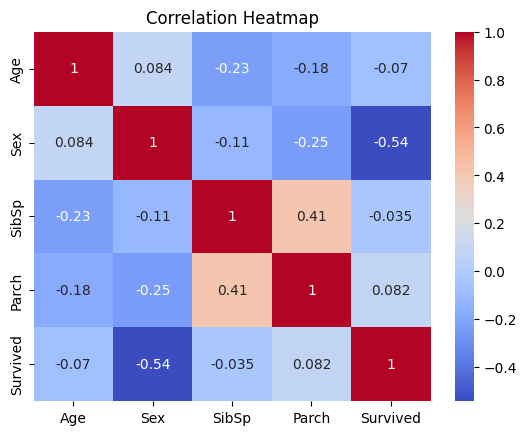

In [56]:
import matplotlib.pyplot as plt
correlation_matrix = fd[['Age', 'Sex', 'SibSp', 'Parch', 'Survived']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Since we cant exclude age and gender and we understand using parch is a good correlation we use only these three

In [57]:
x= fd[['Age','Sex',"Parch"]]
y=fd['Survived']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 23.70it/s]

[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [59]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   0.80               0.78     0.78      0.80   
LabelSpreading                     0.80               0.78     0.78      0.80   
QuadraticDiscriminantAnalysis      0.79               0.78     0.78      0.79   
SGDClassifier                      0.79               0.78     0.78      0.79   
SVC                                0.79               0.78     0.78      0.79   
LinearSVC                          0.79               0.78     0.78      0.79   
BernoulliNB                        0.79               0.78     0.78      0.79   
PassiveAggressiveClassifier        0.79               0.78     0.78      0.79   
RidgeClassifierCV                  0.79               0.78     0.78      0.79   
NearestCentroid                    0.79               0.78     0.78      0.79   
LinearDiscriminantAnalysis  

In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7910447761194029


accuracy score:  0.7910447761194029


<Axes: >

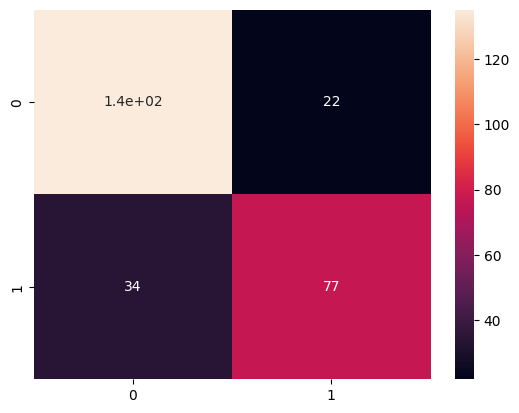

In [61]:
ypred=model.predict(X_test)
print("accuracy score: ", accuracy_score(y_test,ypred))
cm=confusion_matrix(y_test,ypred)
sns.heatmap(cm,annot=True)

In [63]:
import joblib
joblib.dump(model, "survival.joblib")

['survival.joblib']

In [64]:
model=joblib.load("/content/survival.joblib")
prediction = model.predict([[22,1,0]])
if prediction[0] == 0:
    print("Not survived")
else:
    print("Survived")

Not survived
